In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from numpy.polynomial import Polynomial

### Hermite Interpolation

In [ ]:
def l(k, x):            # This is just Lagrange basis
    n = len(x)
    assert (k < len(x))
    x_k = x[k]
    x_copy = np.delete(x, k)
    denominator = np.prod(x_copy - x_k)
    coeff = []
    for i in range(n):
        coeff.append(sum([np.prod(x) for x in combinations(x_copy, i)]) 
                     * (-1)**(i) / denominator)
    coeff.reverse()
    return Polynomial(coeff)

def h_k(k, x):
    l_k = l(k, x)
    l_k_prime = l_k.deriv(1)
    l_k_sqr = l_k**2
    coeff = [1+2*x[k]*l_k_prime(x[k]), -2*l_k_prime(x[k])]
    p = Polynomial(coeff)
    return l_k_sqr*p

def h_hat(k, x):
    l_k = l(k, x)
    l_k_sqr = l_k**2
    coeff = [-x[k], 1]
    p = Polynomial(coeff)
    return p*l_k_sqr

def hermit(x, y, y_prime):
    f = Polynomial(0)
    for k in range(len(x)):
        f += y[k]*h_k(k,x) + y_prime[k]*h_hat(k,x)
    return f

1.0 - 5.09295818 x
-1.0 + 5.09295818 x


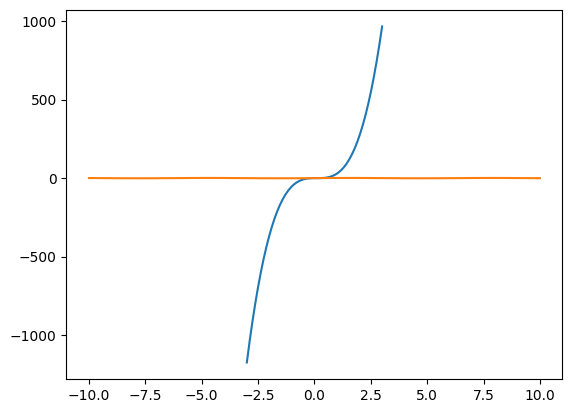

1.0 + 5.72957795 x
2.71428571 - 4.36539272 x
5.28571429 - 1.36418523 x


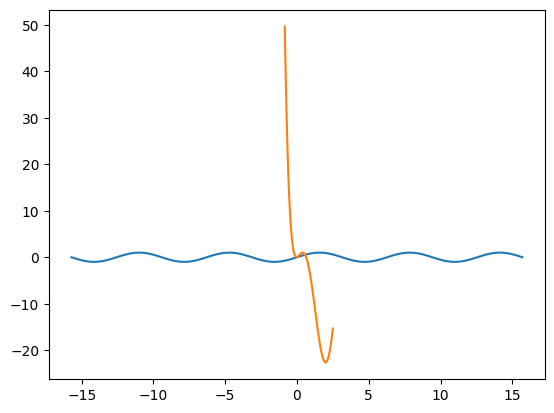

In [ ]:
pi      = np.pi
x       = np.array([0.0, pi/8.0,  pi, 4.0*pi/2.0])
y       = np.array([0.0,    1.0, 0.0,       -1.0])
y_prime = np.array([1.0,    0.0, 1.0,        0.0])


n      = 1
f3     = hermit(x[:(n+1)], y[:(n+1)], y_prime[:(n+1)])
data   = f3.linspace(n=50, domain=[-3, 3])
test_x = np.linspace(-10, 10, 50, endpoint=True)
test_y = np.sin(test_x)
plt.plot(data[0], data[1])
plt.plot(test_x, test_y)
plt.show()


n      = 2
f5     = hermit(x[:(n+1)], y[:(n+1)], y_prime[:(n+1)])
# data   = f5.linspace(n=100, domain=[-0.85, 2.5])
x_arr  = np.linspace(-0.85, 2.5, 100)       # Same as what data was doing
y_arr  = f5(x_arr)

test_x = np.linspace(-5*pi, 5*pi, 100, endpoint=True)
test_y = np.sin(test_x)
plt.plot(test_x, test_y) # 25-
# plt.plot(data[0], data[1]) # 10-33
plt.plot(x_arr, y_arr)
plt.show()